In [84]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Geographic Distribution

In [85]:
cities_df = pd.read_csv('./weatherData/cities.csv')
cities_df.head()

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [86]:
# Create a scatterplot of city locations on a map to visualize the distribution of cities around the world
fig = px.scatter_geo(cities_df,
                    lat=cities_df['latitude'],
                    lon=cities_df['longitude'],
                    hover_name='city_name')

fig.show()

# Country and State Analysis

<BarContainer object of 5 artists>

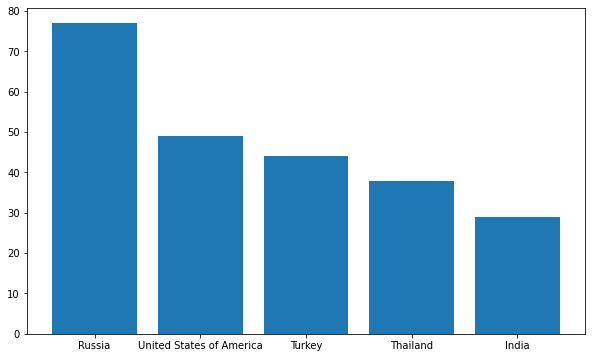

In [87]:

# Visualize the count of cities in each country or state using bar charts or pie charts.
city_count_by_country = cities_df.groupby('country')['city_name'].count()

top_5_countires_with_most_cities = city_count_by_country.sort_values(ascending=False)[:5]

# Get the both the countries and their corresponding values as arrays
country_count = top_5_countires_with_most_cities.values
country = top_5_countires_with_most_cities.index

# Display bar graph

plt.figure(figsize=(10, 6))
plt.bar(country, country_count)

# Hemisphere Analysis

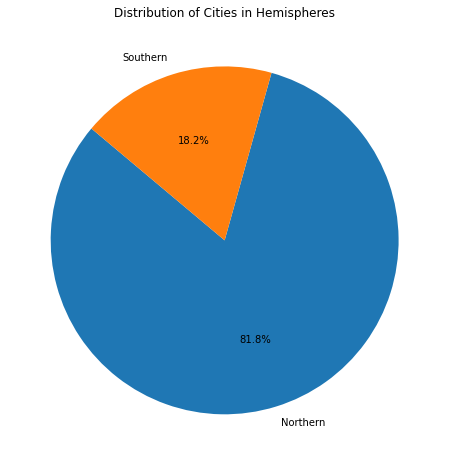

In [88]:
# Use a bar chart or pie chart to show the distribution of cities in the Northern and Southern hemispheres
# Create a 'Hemisphere' column to tell if the city is in the Northern or Southern hemisphere
cities_df['hemisphere'] = cities_df['latitude'].apply(lambda lat: 'Northern' if lat >=0 else 'Southern')

nothern_or_southern_count = cities_df['hemisphere'].value_counts()

labels = nothern_or_southern_count.index
sizes = nothern_or_southern_count

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cities in Hemispheres')
plt.show()

# Population Analysis

In [89]:
population_df = pd.read_csv('./weatherData/countries.csv')
population_df.head()

,country,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,continent
0,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,Asia
1,Albania,Shqipëria,AL,ALB,2895947.0,28748.0,Tirana,41.326873,19.818791,Southern Europe,Europe
2,Algeria,الجزائر,DZ,DZA,38700000.0,2381741.0,Algiers,36.775361,3.060188,Northern Africa,Africa
3,American Samoa,American Samoa,AS,ASM,55519.0,199.0,Pago Pago,-14.275479,-170.704830,Polynesia,Oceania
4,Angola,Angola,AO,AGO,24383301.0,1246700.0,Luanda,-8.827270,13.243951,Central Africa,Africa


In [90]:
# Visualize the population on a map.
fig = px.choropleth(population_df, locations="iso3",
                    color="population", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )
fig.show()